# Mathematical Formula Behind OLS

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.DataFrame({'Height':[140,165,146,150,142],'Age':[15,17,16,17,18],'Weight':[45,65,53,49,45]})
data

,Height,Age,Weight
0,140,15,45
1,165,17,65
2,146,16,53
3,150,17,49
4,142,18,45


**Model to predict height using weight**
- $H = \beta_0+\beta_1 W$

**Estimation of $\beta_0 \text{ and }\beta_1$**
- There are 2 methods to determine these.
  - OLS and Gradient Decent.
- $\beta_1 = \frac {\sum(x-\bar x)\times(y - \bar y) }{\sum(x - \bar x)^2} $
- $ \beta_0 = \bar y - \beta_1 \times \bar x$

In [ ]:
b1 = (np.sum((data.Weight - data.Weight.mean())*(data.Height - data.Height.mean())))/(np.sum((data.Weight-data.Weight.mean())**2))
b1

1.1366279069767442

In [ ]:
b0 = (data.Height.mean())-(b1*data.Weight.mean())
b0

90.17732558139534

- Our model here is 
  - $\text{Height}=90.1773+1.13\times\text{Weight}$

***Predicted values***

In [ ]:
ypred = b0 + b1*data.Weight

In [ ]:
ypred

0    141.325581
1    164.058140
2    150.418605
3    145.872093
4    141.325581
Name: Weight, dtype: float64

In [ ]:
data.Height

0    140
1    165
2    146
3    150
4    142
Name: Height, dtype: int64

**Finding the error of the model**

In [ ]:
resid = data.Height-ypred
resid

0   -1.325581
1    0.941860
2   -4.418605
3    4.127907
4    0.674419
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

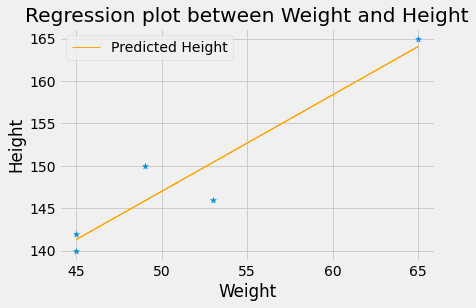

In [ ]:
plt.scatter(data.Weight,data.Height,marker='*')
plt.title('Regression plot between Weight and Height')
plt.plot(data.Weight,ypred,c='orange',label='Predicted Height',lw=1)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(loc='best')
plt.show()

In [ ]:
import seaborn as sns

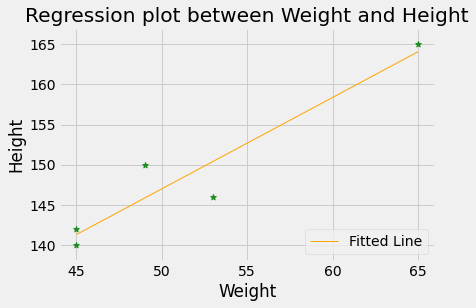

In [ ]:
sns.regplot(data.Weight,data.Height,scatter=True,ci=False,line_kws={'color':'orange','label':'Fitted Line','lw':1},marker='*',scatter_kws={'color':'green'})
plt.xlim(44,66)
plt.title('Regression plot between Weight and Height')
plt.ylim(138,167)
plt.legend(loc='lower right')
plt.show()

**Residuals**

In [ ]:
se = resid**2
sse = np.sum(se)
mse = np.mean(se)
rmse = np.sqrt(mse)

In [ ]:
print(f'RMSE:{rmse}')
print(f'MSE:{mse}')
print(f'SSE:{sse}')

RMSE:2.8164797424329033
MSE:7.932558139534914
SSE:39.662790697674566


**How is $\text{R}^2$ calculated?**

$\text{R}^2 = \frac{\text{Variance}(mean)-\text{Variance}(regression)}{\text{Variance}(mean)}$

In [ ]:
mean_model = np.var(data.Height-data.Height.mean())

In [ ]:
act_model = np.var(data.Height-ypred)

In [ ]:
r2 = (mean_model-act_model)/mean_model
r2

0.8996386875058843

In [ ]:
data.corr()

,Height,Age,Weight
Height,1.000000,0.291182,0.948493
Age,0.291182,1.000000,0.126886
Weight,0.948493,0.126886,1.000000


- Correlation between Height and Weight is 0.9484

In [ ]:
R = 0.9484

In [ ]:
R**2

0.89946256

# Using Library to implement OLS

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('Height~Weight',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     26.89
Date:                Mon, 25 May 2020   Prob (F-statistic):             0.0139
Time:                        04:58:04   Log-Likelihood:                -12.272
No. Observations:                   5   AIC:                             28.54
Df Residuals:                       3   BIC:                             27.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.1773     11.383      7.922      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


# Using Gradient Decent to determine the model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = data.Weight.values.reshape(-1,1)
y = data.Height.values.reshape(-1,1)
model = LinearRegression().fit(X,y)

In [ ]:
ypred1 = model.predict(X)

In [ ]:
ypred1

array([[141.3255814 ],
       [164.05813953],
       [150.41860465],
       [145.87209302],
       [141.3255814 ]])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
r_2 = r2_score(data.Height,ypred1)

In [ ]:
r_2

0.899638687505884

In [ ]:
model.coef_

array([[1.13662791]])

In [ ]:
model.intercept_

array([90.17732558])

**Notes:**
- The Difference between Statsmodels and Sklearn is that, Sklearn uses gradient decent methods to approach the coeff and intercepts.

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Repos/SLR Refresher/data/Refrigerators.xlsx')

In [ ]:
data.head()

,Price,Opcost,CoolSize,FreezeSize,Shelves,Features
0,595,75,7.1,5.7,3,2
1,685,75,7.2,5.7,3,1
2,535,67,8.8,4.5,1,6
3,600,67,8.7,4.5,3,5
4,605,67,8.8,4.5,3,3


In [ ]:
model = smf.ols('Price~Opcost+CoolSize+FreezeSize+Shelves+Features',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     32.05
Date:                Mon, 25 May 2020   Prob (F-statistic):           2.27e-11
Time:                        04:58:05   Log-Likelihood:                -201.12
No. Observations:                  37   AIC:                             414.2
Df Residuals:                      31   BIC:                             423.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -797.8082    271.409     -2.940      0.0

In [ ]:
model.conf_int(0.005)

,0,1
Intercept,-1618.039058,22.422735
Opcost,-13.834079,-0.081604
CoolSize,17.742515,135.251667
FreezeSize,105.803470,321.953499
Shelves,8.060169,67.814394
Features,10.128744,37.398364


In [ ]:
model.conf_int(0.5)

,0,1
Intercept,-983.041294,-612.575029
Opcost,-8.510706,-5.404978
CoolSize,63.228517,89.765665
FreezeSize,189.471853,238.285116
Shelves,31.190119,44.684444
Features,20.684399,26.842710


# Assumptions in a Linear Regression Model

## Linearity of the model

In [ ]:
ypred = model.fittedvalues

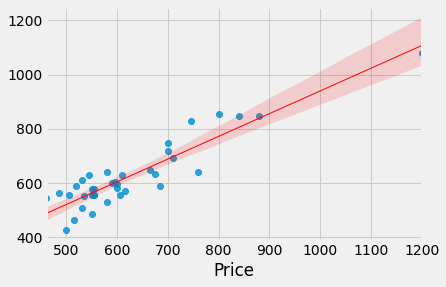

In [ ]:
sns.regplot(data.Price,ypred,line_kws={'lw':1,'color':'r'})
plt.show()

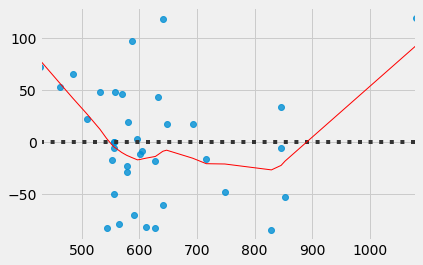

In [ ]:
sns.residplot(ypred,model.resid,line_kws={'color':'r','lw':1},lowess=True)
plt.show()

**Note:**
- Sometimes model as a whole might not be linear. However, there might be a section of the data that might be linear.

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

In [ ]:
linear_rainbow(res=model)

(1.229003687336259, 0.36464475875614183)

**Observation:**
- Linear rainbow is used to split the data and check if the fraction of data is linear

## Normality of the Data

In [ ]:
import scipy.stats as stats

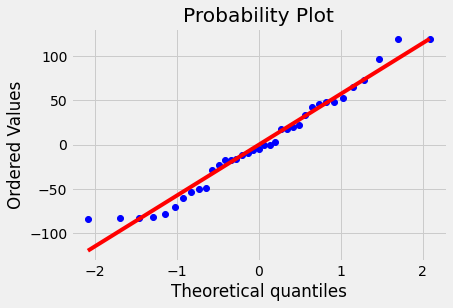

In [ ]:
stats.probplot(model.resid,plot=plt)
plt.show()

In [ ]:
stats.shapiro(model.resid)

(0.9613720774650574, 0.22325065732002258)

## Homoscedasticity of Residuals.

- Consistance variance of residuals is known as homoscedasticity.

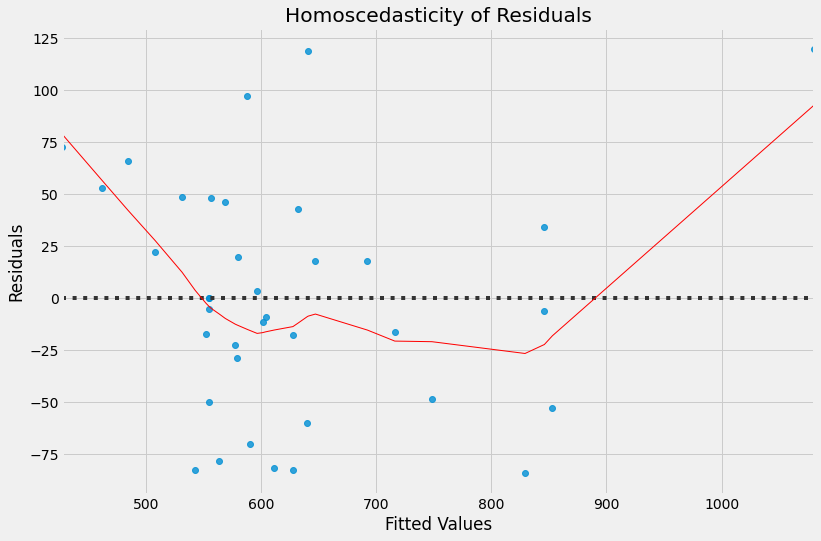

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Homoscedasticity of Residuals')
sns.residplot(model.fittedvalues,model.resid,line_kws={'color':'r','lw':1},lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Statistical Test:**
- Goldfeld quant test

In [ ]:
from statsmodels.stats.api import het_goldfeldquandt

In [ ]:
het_goldfeldquandt(model.resid,model.model.exog)

(1.9918809170245624, 0.11609967581061151, 'increasing')

Here the,
- $H_0:$ Data is Homoscedastic
- $H_1:$ Data is Hetroscedastic

Herethe $p-value$ is greater than the $\alpha$, hence we reject $H_0$, However since the values is just a small difference we are going to accept it as *Homoscendastic* and going to proceed with further tests.

## Test For Multicollinearity

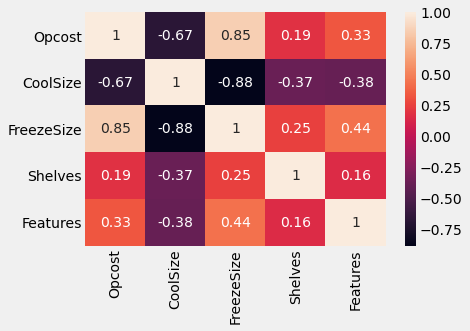

In [ ]:
sns.heatmap(data.drop('Price',1).corr(),annot=True)
plt.show()

We will be using variance inflation factor to check for multicollinearity

- $vif = \frac{1}{1-R^2}$

- If VIF value is high, then multicollinearity exists.
- If VIF value is 1, then there is no multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
inp = data.drop('Price',1)


In [ ]:
vf = pd.DataFrame()
vf['VIF'] = [vif(inp.values,i) for i in range(inp.shape[1])]
vf['Features'] = inp.columns
vf

,VIF,Features
0,259.407845,Opcost
1,24.261754,CoolSize
2,179.916043,FreezeSize
3,6.478725,Shelves
4,3.680741,Features


**Cons of High VIF values:**
- This results in wrong inference.
- If a feature is increased by 1 unit, since the feature is highly collinear, then the value is related to other features as well.

**Pros of VIF:**
- For prediction, the high values of vif doesn't matter.

## Autocorrelation

- This is done by using Durbin Watson Test.
- The value if it is equal to 2 or close by it, then it is considered as not auto correlated.

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     32.05
Date:                Mon, 25 May 2020   Prob (F-statistic):           2.27e-11
Time:                        04:58:06   Log-Likelihood:                -201.12
No. Observations:                  37   AIC:                             414.2
Df Residuals:                      31   BIC:                             423.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -797.8082    271.409     -2.940      0.0

# Feature Interaction

## Using Sklearn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)

In [ ]:
inp = data.drop('Price',1)
inp_pf = pf.fit_transform(inp)
inp_pf = pd.DataFrame(inp_pf)
inp_pf.columns = pf.get_feature_names()

In [ ]:
inp_pf.head(2)

,x0,x1,x2,x3,x4,x0 x1,x0 x2,x0 x3,x0 x4,x1 x2,x1 x3,x1 x4,x2 x3,x2 x4,x3 x4
0,75.0,7.1,5.7,3.0,2.0,532.5,427.5,225.0,150.0,40.47,21.3,14.2,17.1,11.4,6.0
1,75.0,7.2,5.7,3.0,1.0,540.0,427.5,225.0,75.0,41.04,21.6,7.2,17.1,5.7,3.0


In [ ]:
import statsmodels.api as sm

In [ ]:
inp_pf = sm.add_constant(inp_pf)
ols_pf = sm.OLS(data.Price,inp_pf)
mod_pf = ols_pf.fit()
print(mod_pf.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     19.59
Date:                Mon, 25 May 2020   Prob (F-statistic):           4.79e-09
Time:                        04:58:06   Log-Likelihood:                -184.69
No. Observations:                  37   AIC:                             401.4
Df Residuals:                      21   BIC:                             427.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        910.9404   4647.410      0.196      0.8

# Feature Selection Techniques

## Backward Elimination

- This Method is used to eliminate features based on p-values.

In [ ]:
while(len(inp_pf.columns)>0):
  inp_c = sm.add_constant(inp_pf)
  ols_pf = sm.OLS(data.Price,inp_c)
  model_pf = ols_pf.fit()
  feature = model_pf.pvalues[1:].idxmax()
  if model_pf.pvalues[1:].max() > 0.05:
    inp_pf.drop(feature,1,inplace=True)
  else:
    break

In [ ]:
print(model_pf.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     46.58
Date:                Mon, 25 May 2020   Prob (F-statistic):           4.41e-14
Time:                        04:58:06   Log-Likelihood:                -188.44
No. Observations:                  37   AIC:                             392.9
Df Residuals:                      29   BIC:                             405.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2763.2794    456.887     -6.048      0.0

## Forward Feature Selection

- Here, we will add columns based on adjusted $R^2$ values.
- Whenever we add a new feature, if the adjusted $R^2$ value is greater than the adjusted $R^2$ of the previous model, then the added feature is kept.
- If otherwise, the newly added feature is dropped and this is repeated till all the features are done with.

**Cons:**
- Here the statistical significance of the feature is not taken into account.
- Most of the industries don't prefer this method since this takes onlt the adjusted $R^2$ value into account.

In [ ]:
inp = pd.DataFrame(inp_pf.iloc[:,0])
inp_c = sm.add_constant(inp)
ols = sm.OLS(data.Price,inp_c)
mod = ols.fit()
r_adj = mod.rsquared_adj
for i in inp_pf.columns[1:]:
  inp[i] = inp_pf[i]
  inp_c = sm.add_constant(inp)
  ols = sm.OLS(data.Price,inp_c)
  mod = ols.fit()
  if mod.rsquared_adj <= r_adj:
    inp.drop(i,1,inplace=True)
  else:
    r_adj = mod.rsquared_adj
    print(r_adj)
    print(inp.columns)

print(inp.columns)

0.251929442784111
Index(['const', 'x0'], dtype='object')
0.31666340394259296
Index(['const', 'x0', 'x1'], dtype='object')
0.5634653417946314
Index(['const', 'x0', 'x1', 'x2'], dtype='object')
0.7310130506506394
Index(['const', 'x0', 'x1', 'x2', 'x4'], dtype='object')
0.818273722645243
Index(['const', 'x0', 'x1', 'x2', 'x4', 'x1 x2'], dtype='object')
0.8386409295471853
Index(['const', 'x0', 'x1', 'x2', 'x4', 'x1 x2', 'x1 x3'], dtype='object')
0.8986035980130638
Index(['const', 'x0', 'x1', 'x2', 'x4', 'x1 x2', 'x1 x3', 'x2 x3'], dtype='object')
Index(['const', 'x0', 'x1', 'x2', 'x4', 'x1 x2', 'x1 x3', 'x2 x3'], dtype='object')


In [ ]:
ols = sm.OLS(data.Price,inp)
model_ffs = ols.fit()
print(model_ffs.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     46.58
Date:                Mon, 25 May 2020   Prob (F-statistic):           4.41e-14
Time:                        04:58:06   Log-Likelihood:                -188.44
No. Observations:                  37   AIC:                             392.9
Df Residuals:                      29   BIC:                             405.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2763.2794    456.887     -6.048      0.0

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
inp = data.drop('Price',1)
inp_pf = pf.fit_transform(inp)
inp_pf = pd.DataFrame(inp_pf)
inp_pf.columns = pf.get_feature_names()

In [ ]:
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=6)

In [ ]:
rfe.fit(inp_pf,data.Price)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=6, step=1, verbose=0)

In [ ]:
Rank = pd.DataFrame()
Rank['Rank'] = rfe.ranking_
Rank['Features'] = inp_pf.columns
Rank.sort_values('Rank')

,Rank,Features
1,1,x1
2,1,x2
3,1,x3
4,1,x4
9,1,x1 x2
12,1,x2 x3
11,2,x1 x4
14,3,x3 x4
0,4,x0
13,5,x2 x4


## Through $R^2$ value and RMSE Score.

- To determine the best number of features that can be selected.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
pf = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [ ]:
data.head()

,Price,Opcost,CoolSize,FreezeSize,Shelves,Features
0,595,75,7.1,5.7,3,2
1,685,75,7.2,5.7,3,1
2,535,67,8.8,4.5,1,6
3,600,67,8.7,4.5,3,5
4,605,67,8.8,4.5,3,3


In [ ]:
inp = data.drop('Price',1).values

In [ ]:
X = pf.fit_transform(inp)

In [ ]:
y = data.Price.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size = 0.25)

In [ ]:
X_train.shape

(27, 15)

In [ ]:
print(X_train.shape,y_train.shape)

(27, 15) (27,)


In [ ]:
score = {}
for i in range(X_train.shape[0]):
  lr = LinearRegression()
  rfe = RFE(lr,n_features_to_select=i+1)
  rfe.fit(X_train,y_train)
  y_test_pred = rfe.predict(X_test)
  score[i+1]= {}
  score[i+1]['R2 score'] = r2_score(y_test,y_test_pred)
  score[i+1]['RMSE'] = np.sqrt(mean_squared_error(y_test,y_test_pred))


In [ ]:
scores = pd.DataFrame(score)
scores = scores.transpose()
scores.head()

,R2 score,RMSE
1,0.548952,80.261917
2,0.600844,75.503931
3,0.658792,69.808455
4,0.640169,71.688204
5,0.678057,67.809044


In [ ]:
max_r2_features = scores.sort_values('R2 score',ascending=False)['R2 score'].iloc[:1]
best_features = np.array(max_r2_features.index)
best_score = np.array(max_r2_features.values)

In [ ]:
max_rmse_features = scores.sort_values('RMSE')['RMSE'].iloc[:1]
best_rmse_features = np.array(max_rmse_features.index)
best_rmse_score = np.array(max_rmse_features.values)

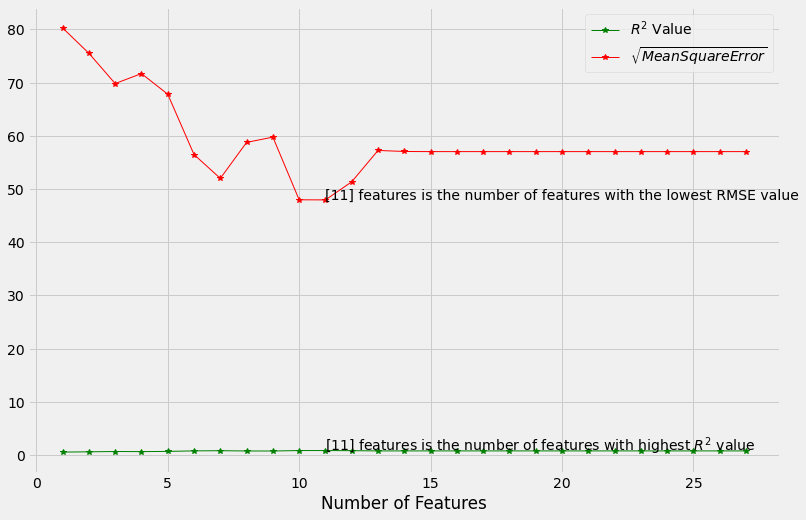

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(scores.index,scores['R2 score'],label=r'$R^2$ Value',color='green',lw=1,marker='*')
plt.plot(scores.index,scores['RMSE'],label=r'$\sqrt{Mean Square Error}$',color='r',lw=1,marker='*')
plt.annotate(f'{best_features} features is the number of features with highest $R^2$ value',xy=(best_features,best_score))
plt.annotate(f'{best_rmse_features} features is the number of features with the lowest RMSE value',xy=(best_rmse_features,best_rmse_score))
plt.xlabel('Number of Features')
plt.legend(loc='best')
plt.show()

## Selecting the best features through RFE

In [ ]:
rfe = RFE(lr,11)

In [ ]:
rfe.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=11, step=1, verbose=0)

In [ ]:
pd.DataFrame(rfe.ranking_,columns=['Ranking'],index=pf.get_feature_names()).sort_values('Ranking')

,Ranking
x0,1
x1,1
x2,1
x3,1
x4,1
x1 x2,1
x1 x3,1
x1 x4,1
x2 x3,1
x2 x4,1


## Using GridSearch Cross Validation

In [ ]:
import sklearn.metrics as sklm
sklm.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
inp = data.drop('Price',1)

In [ ]:
pf = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [ ]:
X = pf.fit_transform(inp.values)
y = data.Price.values

In [ ]:
params = {'n_features_to_select':list(range(1,16))}

In [ ]:
rfe = RFE(lr)

In [ ]:
gsearch = GridSearchCV(rfe,param_grid=params,cv=3,scoring='r2',return_train_score=True)

In [ ]:
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [ ]:
gsearch.best_params_

{'n_features_to_select': 6}

In [ ]:
res_gs = pd.DataFrame(gsearch.cv_results_)
res_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.018176,0.000704,0.000947,0.000338,1,{'n_features_to_select': 1},-0.893624,-0.459326,0.063850,-0.429700,0.391448,5,0.599734,0.594024,0.061499,0.418419,0.252391
1,0.013848,0.004208,0.000768,0.000287,2,{'n_features_to_select': 2},-1.191434,-0.299549,0.131301,-0.453227,0.550829,6,0.784451,0.599272,0.077373,0.487032,0.299375
2,0.007348,0.000153,0.000388,0.000010,3,{'n_features_to_select': 3},-0.719075,0.036747,-1.329868,-0.670732,0.558964,8,0.789437,0.788024,0.210716,0.596059,0.272479
3,0.006974,0.000166,0.000398,0.000003,4,{'n_features_to_select': 4},-0.731182,-0.020195,-1.158113,-0.636497,0.469353,7,0.845305,0.795332,0.233844,0.624827,0.277219
4,0.006349,0.000071,0.000379,0.000007,5,{'n_features_to_select': 5},0.158775,-0.038458,-0.190311,-0.023332,0.142915,2,0.936467,0.881193,0.569204,0.795621,0.161684
5,0.005899,0.000110,0.000394,0.000008,6,{'n_features_to_select': 6},0.162408,0.394699,-0.239734,0.105791,0.262082,1,0.936606,0.926815,0.569279,0.810900,0.170899
6,0.005328,0.000093,0.000388,0.000037,7,{'n_features_to_select': 7},0.200514,0.477783,-1.490313,-0.270672,0.869813,4,0.937092,0.929219,0.597981,0.821431,0.158036
7,0.004824,0.000012,0.000375,0.000010,8,{'n_features_to_select': 8},0.188885,0.446639,-1.021938,-0.128805,0.640247,3,0.937147,0.936937,0.600519,0.824868,0.158639
8,0.005714,0.000900,0.000546,0.000119,9,{'n_features_to_select': 9},0.151612,0.453791,-3.785321,-1.059973,1.931057,9,0.963086,0.936987,0.726452,0.875508,0.105936
9,0.003814,0.000108,0.000432,0.000006,10,{'n_features_to_select': 10},0.226255,0.446672,-11.670277,-3.665783,5.660747,10,0.963383,0.937586,0.746936,0.882635,0.096530


In [ ]:
gsearch.best_score_

0.10579127183698005

# Hyper Parameter Tuning

## Regularization

- One of the major aspects in training your machine learning model is avoiding overfitting.
- The model will have low accuracy if it is overfitted.
- This happens when your model is trying too hard to capture the noise in the the training dataset.
- ***By noise we mean the data points that doesn't truly represent the properties of our data, but random chance.***
- ***The Concept of balancing bias and variance, is helpful in understanding the phenomenon of overfitting.***


- This is a form of regression, that constrains/regularizes or shrinks the coefficient estimates towards zero.
- In other words, this technique discourages learning a more complex or a flexible model, so as to avoid the risk of overfitting.
- A simple linear regression model looks like this,

  $Y = \beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p$

- Here the $\beta$ represents the coefficient for the different estimators or predictors(X) and Y is the output or the response variable.
- The Fitting procedure involves a loss function, known as the residual sum of squares or RSS. The Coefficients are chose such that they minimize the loss function.